In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from src.styles import set_styles, TXT_ACC, TXT_RESET

SEED=42

import warnings
warnings.filterwarnings('ignore')

set_styles()

In [2]:
class CFG:
    dir_train = 'data\\train'
    path_target = 'data\\train\\train_labels.csv'

In [3]:
df_train_labels = pd.read_csv(CFG.path_target)
df_train_labels

image_name  \
0                    00.png   
1                    01.png   
2                    02.png   
3                    03.png   
4                    04.png   
...                     ...   
2143  3dom_fbk_img_1554.png   
2144           img_0257.png   
2145  3dom_fbk_img_1538.png   
2146           img_0182.png   
2147           img_0055.png   

                                        rotation_matrix  \
0     0.999017467386748;-0.01951432487219089;0.03979...   
1     0.999147719991382;-0.021624129414769648;0.0351...   
2     0.9992527616183833;-0.02402019259931326;0.0302...   
3     0.9993946226667176;-0.02356062921667625;0.0255...   
4     0.9995276708105233;-0.02256816267742356;0.0208...   
...                                                 ...   
2143  0.01591948448470304;-0.9942358284779308;0.1060...   
2144  0.7798812386299148;-0.11966528279975605;-0.614...   
2145  0.212343457025313;-0.9771913266348059;-0.00271...   
2146  0.9949298086968184;-0.025133801870663264;0.097...   
2147  0.7856640336507601;0.06405952903388078;0.61532...   

                                     translation_vector  \
0     -0.011700149127917355;0.018812528601332625;0.3...   
1     -0.011610785964818585;0.016710808069866724;0.3...   
2     -0.011589797430545654;0.014113680489915202;0.3...   
3     -0.011471598819000773;0.011325953000912126;0.3...   
4     -0.011389007765655301;0.008237801582322509;0.3...   
...                                                 ...   
2143  4.210366452845919;3.6889779999757972;13.996046...   
2144  5.324959411151901;-1.1477821619213906;18.44637...   
2145  2.4197481771662037;-1.5059153783557069;9.23436...   
2146  3.7150058927063077;-3.918144148659411;35.11529...   
2147  -1.3855356886340602;2.258165398925688;38.10900...   

                                     calibration_matrix               dataset  \
0     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
1     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
2     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
3     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
4     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
...                                                 ...                   ...   
2143                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2144                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2145                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2146                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2147                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   

                     scene  
0     transp_obj_glass_cup  
1     transp_obj_glass_cup  
2     transp_obj_glass_cup  
3     transp_obj_glass_cup  
4     transp_obj_glass_cup  
...                    ...  
2143              dioscuri  
2144              dioscuri  
2145              dioscuri  
2146              dioscuri  
2147              dioscuri  

[2148 rows x 6 columns]

In [4]:
df_train_labels.groupby(['dataset', 'scene'])['image_name'].count().to_frame()

image_name
dataset                          scene                                       
church                           church                                   110
dioscuri                         dioscuri                                  70
lizard                           lizard                                   711
multi-temporal-temple-baalshamin multi-temporal-temple-baalshamin          68
pond                             pond                                    1117
transp_obj_glass_cup             transp_obj_glass_cup                      36
transp_obj_glass_cylinder        transp_obj_glass_cylinder                 36

In [5]:
datasets = df_train_labels['dataset'].unique()
datasets

array(['transp_obj_glass_cup', 'transp_obj_glass_cylinder',
       'multi-temporal-temple-baalshamin', 'lizard', 'pond', 'church',
       'dioscuri'], dtype=object)

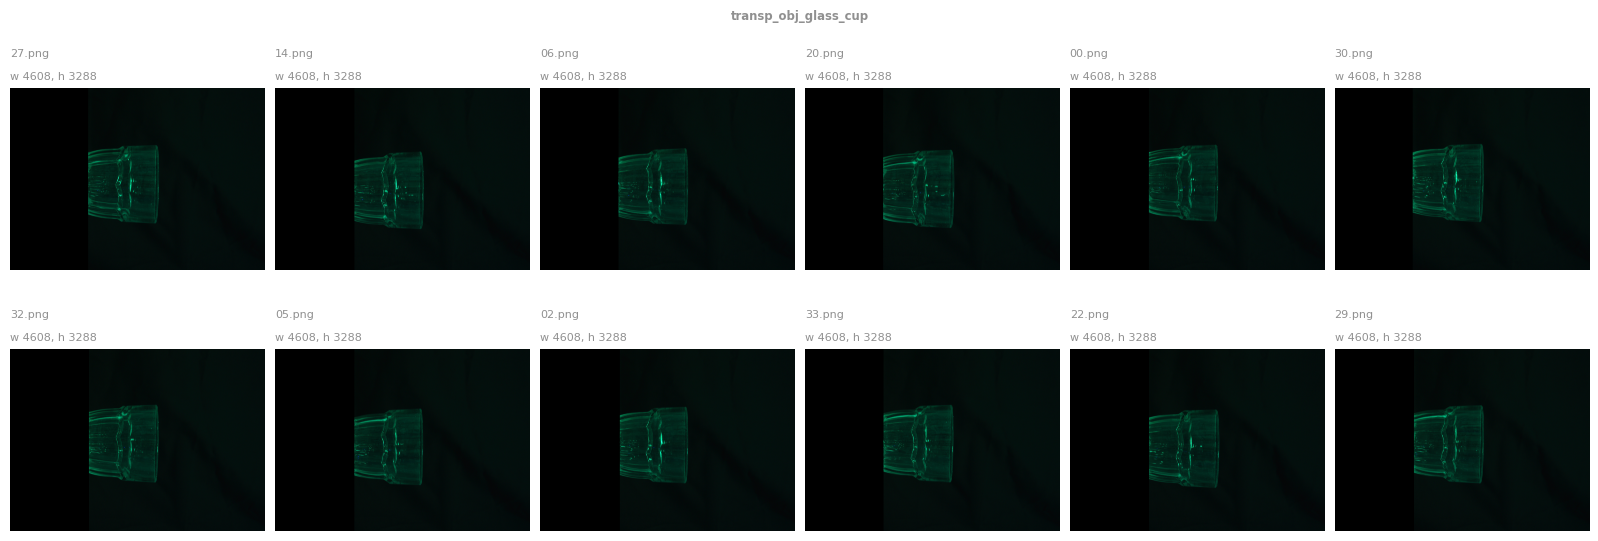

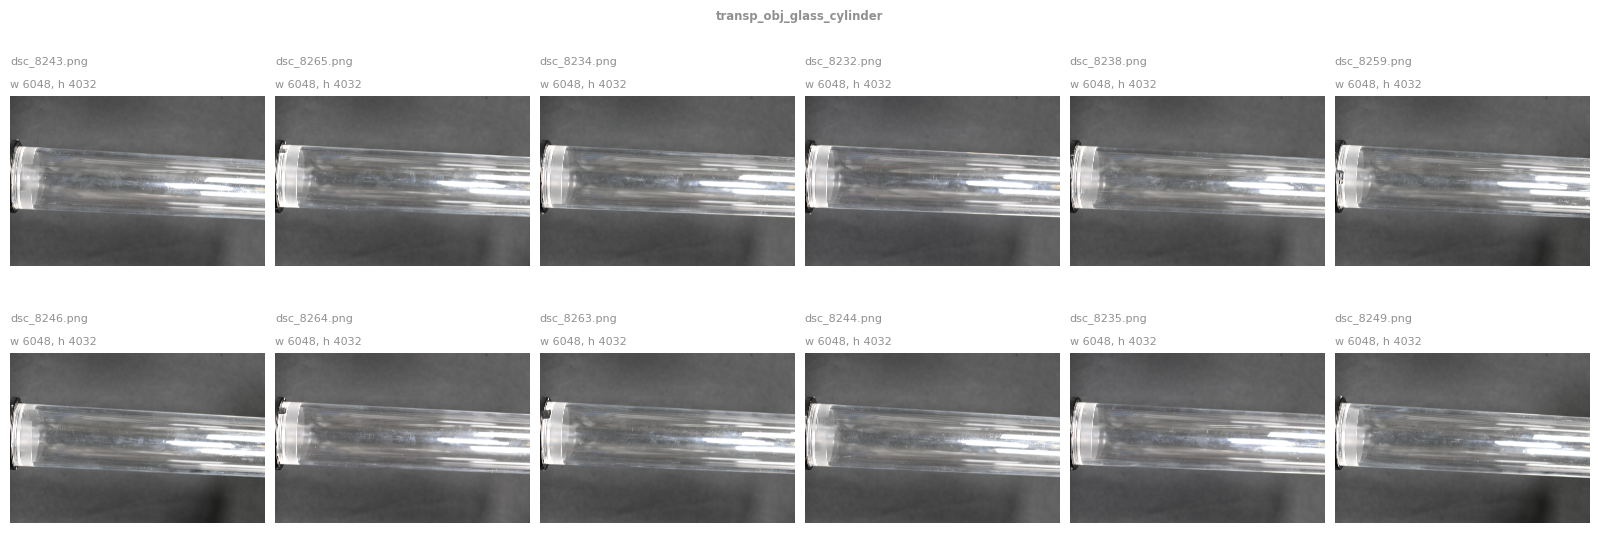

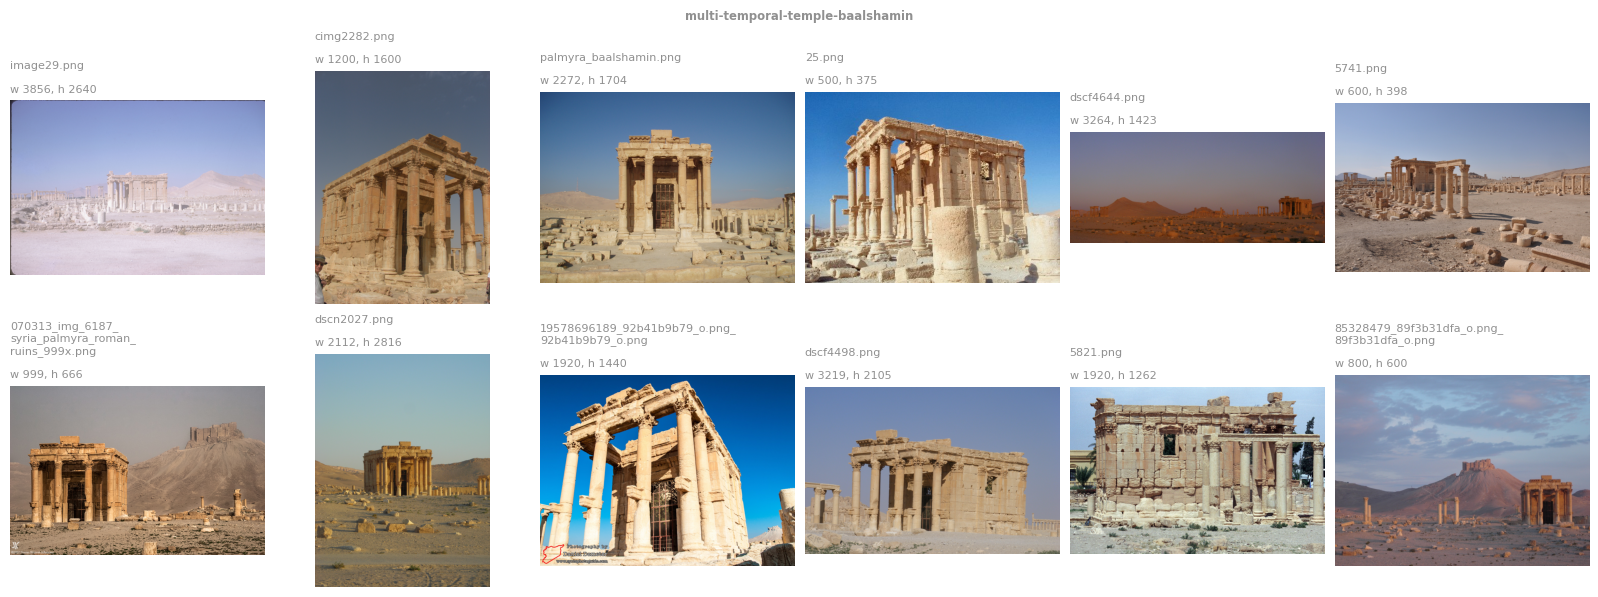

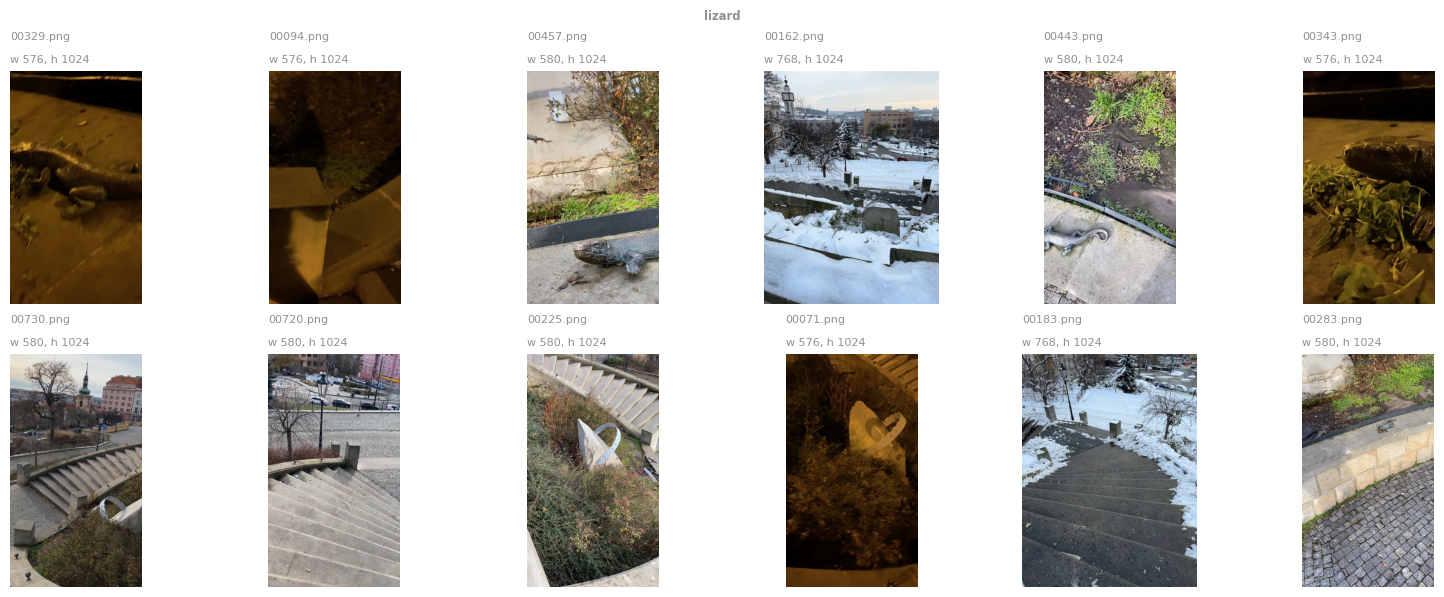

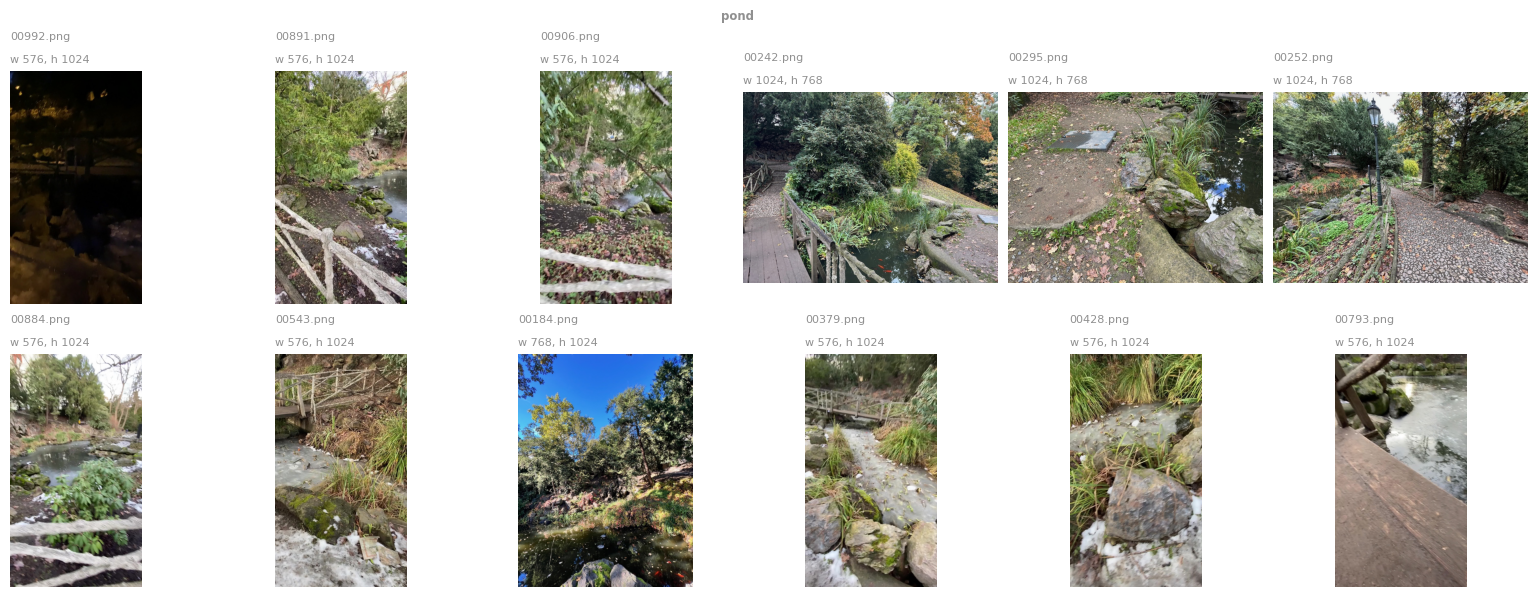

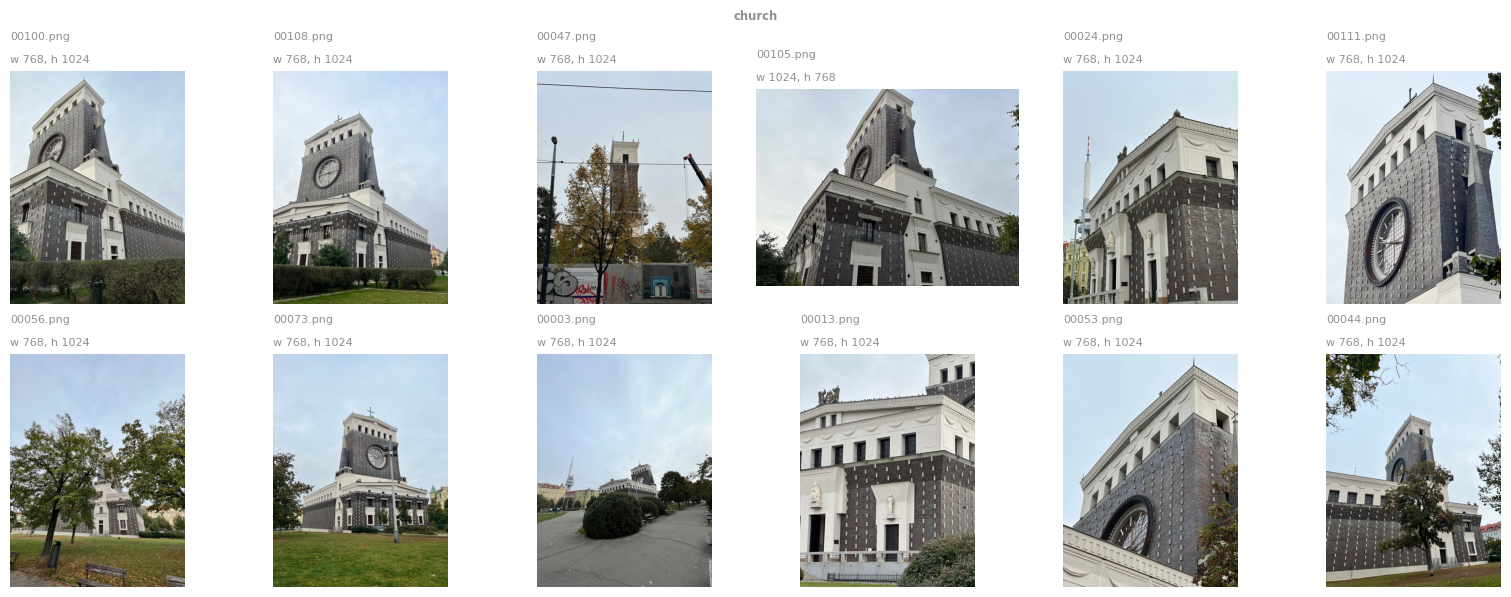

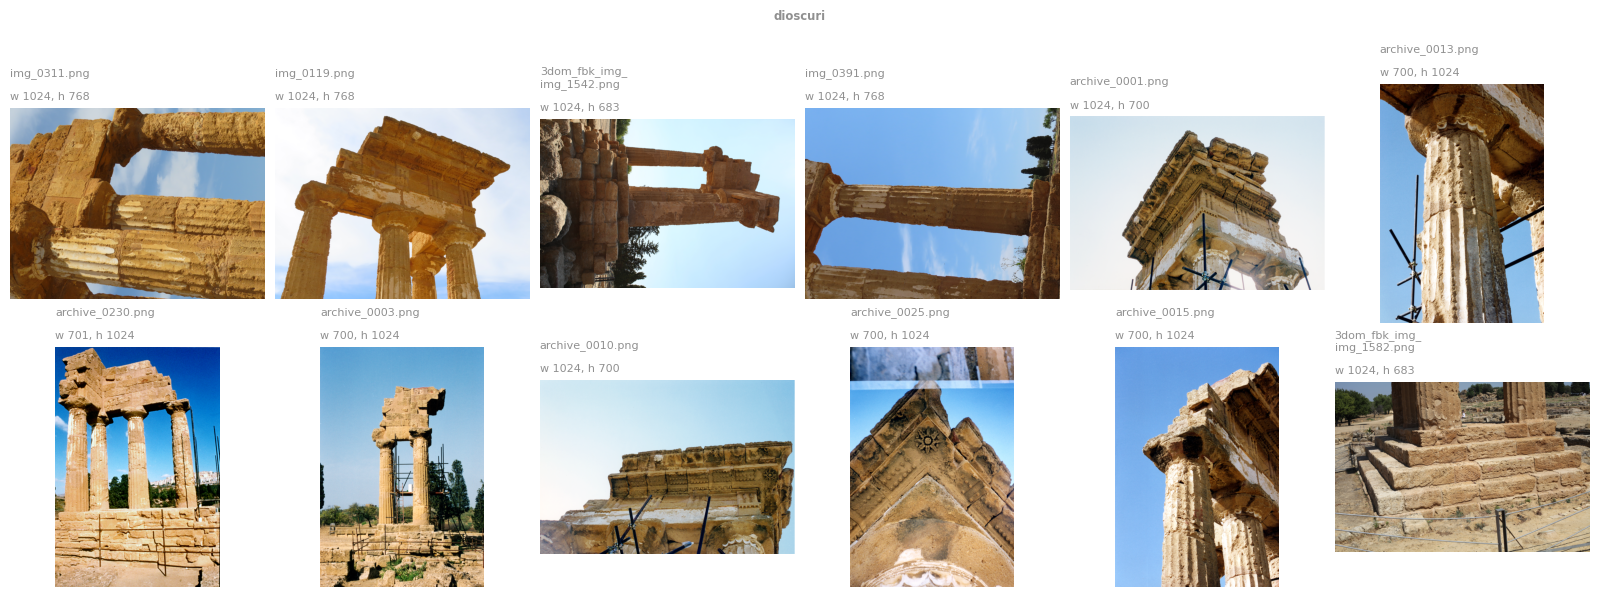

In [6]:
ncols = 6
nrows = 2
n_images = ncols*nrows

for dataset in datasets:
    image_names = df_train_labels.query(f'dataset == "{dataset}"')['image_name'].sample(n=n_images).to_list()
    
    _, axes = plt.subplots(ncols=6, nrows=nrows, figsize=(16, 3*nrows))
    axes = axes.ravel()
    for image_name, ax in zip(image_names, axes):
        path = os.path.join(CFG.dir_train, dataset, 'images', image_name)
        img = plt.imread(path)
        ax.imshow(img)

        if len(image_name) > 15:
            substr = image_name.split('_')
            image_name = '\n'.join([f'{substr[i]}_{substr[i+1]}_{substr[i+2]}_' for i in range(0, len(substr)-2, 3)])
            image_name += '\n' + '_'.join(substr[-2:])

        ax.set_title(f'{image_name}\n\nw {img.shape[1]}, h {img.shape[0]}', fontsize=8, fontweight='normal')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle(dataset, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualize translation vectors for each set of images

In [7]:
df_train_labels[['tx', 'ty', 'tz']] = df_train_labels['translation_vector'].str.split(';', expand=True).astype(float)

rotations_cols = ['r' + ''.join([str(i),str(j)]) for i in range(3) for j in range(3)]
df_train_labels[rotations_cols] = df_train_labels['rotation_matrix'].str.split(';', expand=True).astype(float)

df_train_labels

image_name  \
0                    00.png   
1                    01.png   
2                    02.png   
3                    03.png   
4                    04.png   
...                     ...   
2143  3dom_fbk_img_1554.png   
2144           img_0257.png   
2145  3dom_fbk_img_1538.png   
2146           img_0182.png   
2147           img_0055.png   

                                        rotation_matrix  \
0     0.999017467386748;-0.01951432487219089;0.03979...   
1     0.999147719991382;-0.021624129414769648;0.0351...   
2     0.9992527616183833;-0.02402019259931326;0.0302...   
3     0.9993946226667176;-0.02356062921667625;0.0255...   
4     0.9995276708105233;-0.02256816267742356;0.0208...   
...                                                 ...   
2143  0.01591948448470304;-0.9942358284779308;0.1060...   
2144  0.7798812386299148;-0.11966528279975605;-0.614...   
2145  0.212343457025313;-0.9771913266348059;-0.00271...   
2146  0.9949298086968184;-0.025133801870663264;0.097...   
2147  0.7856640336507601;0.06405952903388078;0.61532...   

                                     translation_vector  \
0     -0.011700149127917355;0.018812528601332625;0.3...   
1     -0.011610785964818585;0.016710808069866724;0.3...   
2     -0.011589797430545654;0.014113680489915202;0.3...   
3     -0.011471598819000773;0.011325953000912126;0.3...   
4     -0.011389007765655301;0.008237801582322509;0.3...   
...                                                 ...   
2143  4.210366452845919;3.6889779999757972;13.996046...   
2144  5.324959411151901;-1.1477821619213906;18.44637...   
2145  2.4197481771662037;-1.5059153783557069;9.23436...   
2146  3.7150058927063077;-3.918144148659411;35.11529...   
2147  -1.3855356886340602;2.258165398925688;38.10900...   

                                     calibration_matrix               dataset  \
0     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
1     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
2     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
3     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
4     5809.066058292364;0.0;2496.9582994472266;0.0;5...  transp_obj_glass_cup   
...                                                 ...                   ...   
2143                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2144                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2145                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2146                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   
2147                0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0              dioscuri   

                     scene        tx        ty         tz       r00       r01  \
0     transp_obj_glass_cup -0.011700  0.018813   0.392921  0.999017 -0.019514   
1     transp_obj_glass_cup -0.011611  0.016711   0.390435  0.999148 -0.021624   
2     transp_obj_glass_cup -0.011590  0.014114   0.388338  0.999253 -0.024020   
3     transp_obj_glass_cup -0.011472  0.011326   0.386635  0.999395 -0.023561   
4     transp_obj_glass_cup -0.011389  0.008238   0.385462  0.999528 -0.022568   
...                    ...       ...       ...        ...       ...       ...   
2143              dioscuri  4.210366  3.688978  13.996046  0.015919 -0.994236   
2144              dioscuri  5.324959 -1.147782  18.446375  0.779881 -0.119665   
2145              dioscuri  2.419748 -1.505915   9.234369  0.212343 -0.977191   
2146              dioscuri  3.715006 -3.918144  35.115297  0.994930 -0.025134   
2147              dioscuri -1.385536  2.258165  38.109008  0.785664  0.064060   

           r02       r10       r11       r12       r20       r21       r22  
0     0.039791  0.035804 -0.173747 -0.984139  0.026118  0.984597 -0.172878  
1     0.035160  0.035071 -0.004484 -0.999375  0.021768  0.999756 -0.003722  
2     0.030281  0.034015  0.174466 -0.984076  0.0

In [8]:
datasets = ['dioscuri', 'church', 'multi-temporal-temple-baalshamin', 'transp_obj_glass_cup']

for dataset in datasets:
    print(dataset)
    df = df_train_labels.query(f'dataset=="{dataset}"')
    vec_len = np.sqrt((df[['tx', 'ty', 'tx']]**2).sum(axis=1))
    fig = px.scatter_3d(df, x='tx', y='ty', z='tz', opacity=0.7, color=vec_len)
    fig.show()

dioscuri


church


multi-temporal-temple-baalshamin


transp_obj_glass_cup


# Rotation vector X

In [9]:
for dataset in datasets:
    print(dataset)
    df = df_train_labels.query(f'dataset=="{dataset}"')
    vec_len = np.sqrt((df[['tx', 'ty', 'tx']]**2).sum(axis=1))
    fig = px.scatter_3d(df, x='r00', y='r10', z='r20', opacity=0.3, color=vec_len)
    fig.show()

dioscuri


church


multi-temporal-temple-baalshamin


transp_obj_glass_cup


# Rotation vector Y

In [10]:
for dataset in datasets:
    print(dataset)
    df = df_train_labels.query(f'dataset=="{dataset}"')
    vec_len = np.sqrt((df[['tx', 'ty', 'tx']]**2).sum(axis=1))
    fig = px.scatter_3d(df, x='r01', y='r11', z='r21', opacity=0.3, color=vec_len)
    fig.show()

dioscuri


church


multi-temporal-temple-baalshamin


transp_obj_glass_cup


# Rotation vector Z

In [11]:
for dataset in datasets:
    print(dataset)
    df = df_train_labels.query(f'dataset=="{dataset}"')
    vec_len = np.sqrt((df[['tx', 'ty', 'tx']]**2).sum(axis=1))
    fig = px.scatter_3d(df, x='r02', y='r12', z='r22', opacity=0.3, color=vec_len)
    fig.show()

dioscuri


church


multi-temporal-temple-baalshamin


transp_obj_glass_cup
